<h1>INFOSYS SPRINGBOARD</h1>

<div style="border-radius:10px; padding: 15px; background-color: #C1FDBC; font-size:130%; text-align:left">

<h2 align="left"><font color=black> Building Anomaly Detection System using Python</font></h2>

<div style="border-radius:10px; padding: 15px; background-color: #87CEEB; font-size:130%; text-align:left">

<h2 align="left"><font color=#4682B4>Problem:</font></h2>


In this project, we delve deep into the thriving sector of __Security__ by analyzing a __Anomaly detection on Healthcare Dataset__ from a USA-based Health Service Providers, available at the kaggle. This dataset documents all transactions between patients and service providers. Our primary objective is to amplify the efficiency of Healthcare System and avoid fraudulent transactions in __Healthcare system__. We aim to transform the data into a -centric dataset  that will facilitate the Base for Anomaly Detection system of patient providing better service , ultimately enhancing security ,efficiency and patient service.

<a id="setup"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>

In [1]:
#importing necessary libraries
#loading dataset

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

hdata = pd.read_csv(r'C:\Users\tmbha\Downloads\ifosys_springboard\hdata.csv')

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Initial Data Analysis</p>

In [2]:
hdata

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [3]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [4]:
hdata.describe(include='object').T

,count,unique,top,freq
Last Name/Organization Name of the Provider,100000,42820,PATEL,557
First Name of the Provider,95745,13022,MICHAEL,2350
Middle Initial of the Provider,70669,29,A,8152
Credentials of the Provider,92791,1854,MD,32874
Gender of the Provider,95746,2,M,66641
Entity Type of the Provider,100000,2,I,95746
Street Address 1 of the Provider,100000,51928,200 1ST ST SW,244
Street Address 2 of the Provider,40637,10024,SUITE 200,1624
City of the Provider,100000,5846,NEW YORK,1061
State Code of the Provider,100000,58,CA,7775


In [5]:
hdata.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


<a id="data_cleaning"></a>
# <p style="background-color: #ff6300; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 |  Data Cleaning & Transformation</p>


<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>

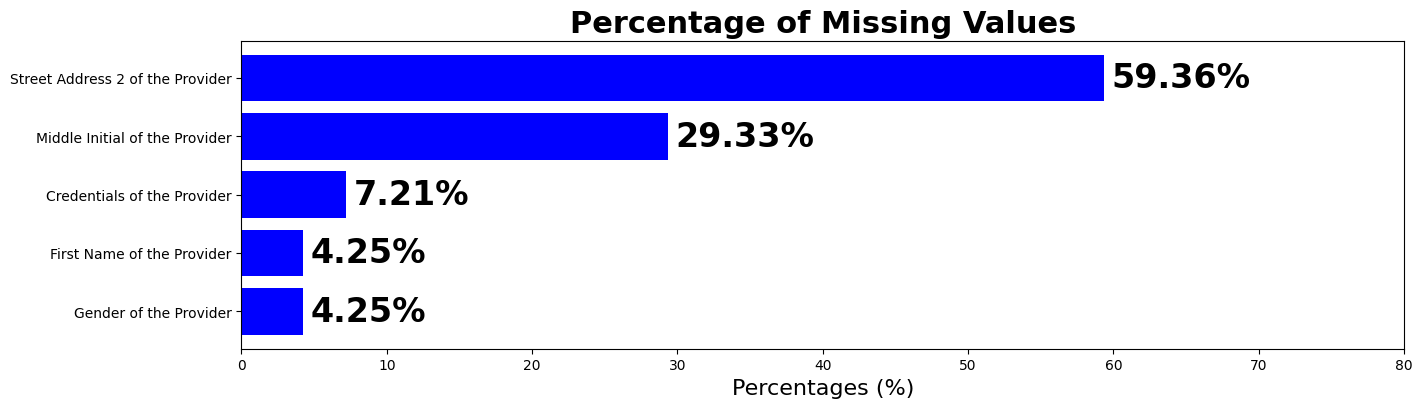

In [6]:
# Calculating the percentage of missing values for each column
missing_data = hdata.isnull().sum()

missing_percentage = (missing_data[missing_data > 0] / hdata.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='blue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=24, color='black')

# Set x-axis limit
ax.set_xlim([0, 80])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

#print(missing_data)

<div style="border-radius:10px; padding: 15px; background-color: #87CEEB; font-size:120%; text-align:left">

<h3 align="left"><font color=#4682B4>Handling Missing Values Strategy:</font></h3>

- __`Street Address 2 of the Provider` (59.36% missing values)__
   - The `Street Address 2 of the Provider` column contains nearly a 60% of missing data. This column is not essential for Anomaly Detection and creating system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis. We will Drop this column.
    
- __`Middle Initial of the Provider` (29.33% missing values)__
   - The `Middle Initial of the Provider` column has a major percentage of missing values. However, it has importance but we cannot fill these missing values are unique as middile initial can any , we also drop this column.

- __`Credentials of the Provider` (7.21% missing values)__
   - The `Credentials of the Provider` column has a small 7.21% percentage of missing values. However, it has importance but we can fill these missing values with highest occurrence/frequently occurring of value in the column.

- __`First Name of the Provider` (4.25% missing values)__
   - The `First Name of the Provider` column has a small 7.21% percentage of missing values. we will drop this column as we cannot randomaly give name to any person which is not present in the record.

- __`Gender of the Provider` (7.25% missing values)__
   - The `Gender of the Provider` column has a small 7.21% percentage of missing values. However, it has importance but we can fill these missing values with highest occurrence/frequently occurring of value in the column.

By removing columns with missing values in the `Street Address 2 of the Provider`, `First Name of the Provider` and `Middle Initial of the Provider` columns, and filling missing values in `Credentials of the Provider` and `Gender of the Provider`   we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate anomaly detection and creating an effective anomaly detection system.

In [7]:
#replacing null values in Credentials of the Provider and Gender of the Provider by frequent item in that column
#finding frequent value

print('Frequent value in "Credentials of the Provider" is  ',hdata["Credentials of the Provider"].mode()[0])
print('Frequent value in "Gender of the Provider" is  ' ,hdata['Gender of the Provider'].mode()[0])

#replacing null values missing values
hdata["Credentials of the Provider"] = hdata["Credentials of the Provider"].fillna(hdata["Credentials of the Provider"].mode()[0])
hdata["Gender of the Provider"] = hdata["Gender of the Provider"].fillna(hdata["Gender of the Provider"].mode()[0])

hdata.info()

Frequent value in "Credentials of the Provider" is   MD
Frequent value in "Gender of the Provider" is   M
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               100000 non-null  object 
 6   Gender of the Provider                                    100000 non-null  

In [8]:
# dot removing from Credentials of the Provider

dot_columns = ['Credentials of the Provider']

for col in dot_columns:
    hdata[col]=hdata[col].str.replace('.','')

hdata.head(5).T

,0,1,2,3,4
index,8774979,3354385,3001884,7594822,746159
National Provider Identifier,1891106191,1346202256,1306820956,1770523540,1073627758
Last Name/Organization Name of the Provider,UPADHYAYULA,JONES,DUROCHER,FULLARD,PERROTTI
First Name of the Provider,SATYASREE,WENDY,RICHARD,JASPER,ANTHONY
Middle Initial of the Provider,NaN,P,W,NaN,E
Credentials of the Provider,MD,MD,DPM,MD,DO
Gender of the Provider,F,F,M,M,M
Entity Type of the Provider,I,I,I,I,I
Street Address 1 of the Provider,1402 S GRAND BLVD,2950 VILLAGE DR,20 WASHINGTON AVE,5746 N BROADWAY ST,875 MILITARY TRL
Street Address 2 of the Provider,FDT 14TH FLOOR,NaN,STE 212,NaN,SUITE 200


<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'>Merging columns</span></b>

In [9]:

#merging names of provider
def combine_columns(row):
    return  str(row['Last Name/Organization Name of the Provider'])+ ' '+ str(row['First Name of the Provider']) + ' ' + str(row['Middle Initial of the Provider'])
hdata['Name'] = hdata.apply(combine_columns, axis=1)

#merging names of Address
def combine_address(row):
    return  str(row['Street Address 1 of the Provider'])+ ' '+ str(row['Street Address 2 of the Provider']) 
hdata['Full Address'] = hdata.apply(combine_address, axis=1)

hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               100000 non-null  object 
 6   Gender of the Provider                                    100000 non-null  object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [10]:
DropCols = ['index', 'National Provider Identifier','Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider','Zip Code of the Provider',"HCPCS Code"]
df = hdata.drop(DropCols, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Transforming Object values to Numeric</span></b>

In [11]:
numeric_columns = ['Number of Services','Number of Medicare Beneficiaries', 
                   "Number of Distinct Medicare Beneficiary/Per Day Services",'Average Medicare Allowed Amount',
                   'Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount']
df[numeric_columns].describe(include='object').T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the numeric_columns Data:</font></h3>
    
- All the quantaties from the numeric_columns are showing general description , indicating that these are the object type containing numeric value.
- The numeric_columns shows there is no missing values hence we can convert it in numeric data type .

In [12]:
#converted object data types to numeric

#removed comma
def remove_comma(x):
    return x.replace(",","")

#converted object data type to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].apply(lambda x: remove_comma(x)))
    
df.describe()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,239.671424,89.809310,142.115680,101.434155,354.550451,77.358795,78.030693
std,2493.187089,1109.616902,1640.227228,257.242779,1062.608271,199.718813,200.045458
min,11.000000,11.000000,11.000000,0.010000,0.010000,0.008679,0.008679
25%,21.000000,17.000000,20.000000,24.270000,57.647876,19.335228,20.121849
50%,43.000000,32.000000,40.000000,65.095000,146.000000,47.020176,47.841094
75%,118.000000,75.000000,106.000000,113.160000,298.932111,84.894452,84.879560
max,282739.000000,190306.000000,282737.000000,20494.000000,62694.000000,16067.300000,16957.148000


<a id="scaling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Visualizations </p>

<a id="rfm_features"></a>
# <b><span style='color:#fcc36d'>Step 4.1 |</span><span style='color:#ff6200'> Univariate Analysis</span></b>

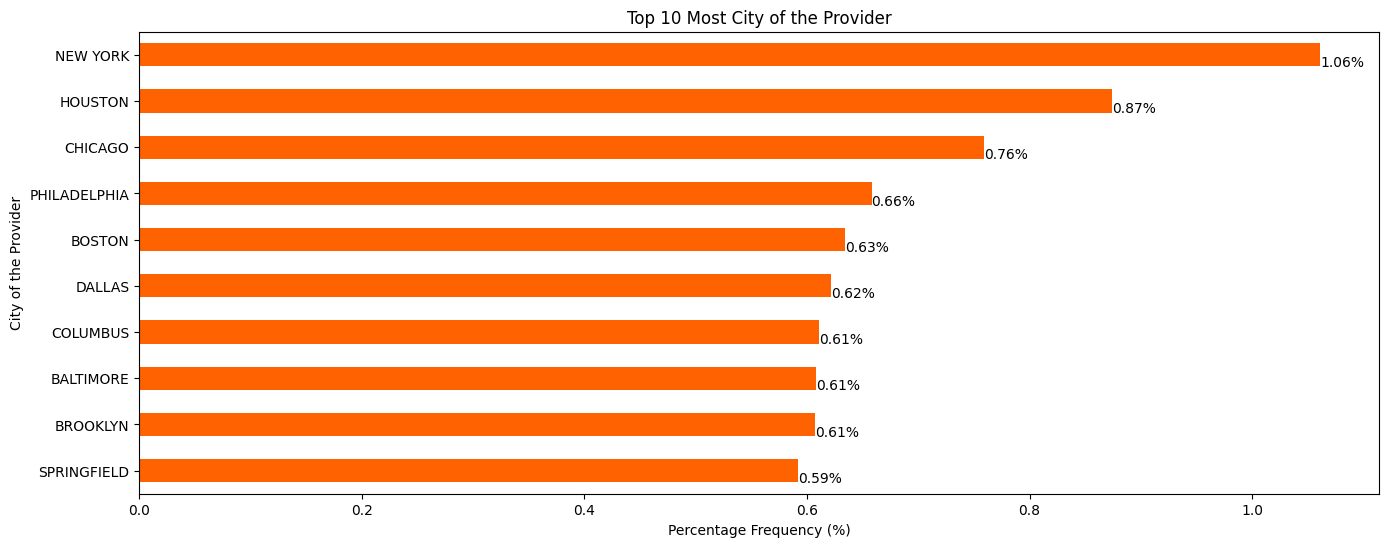

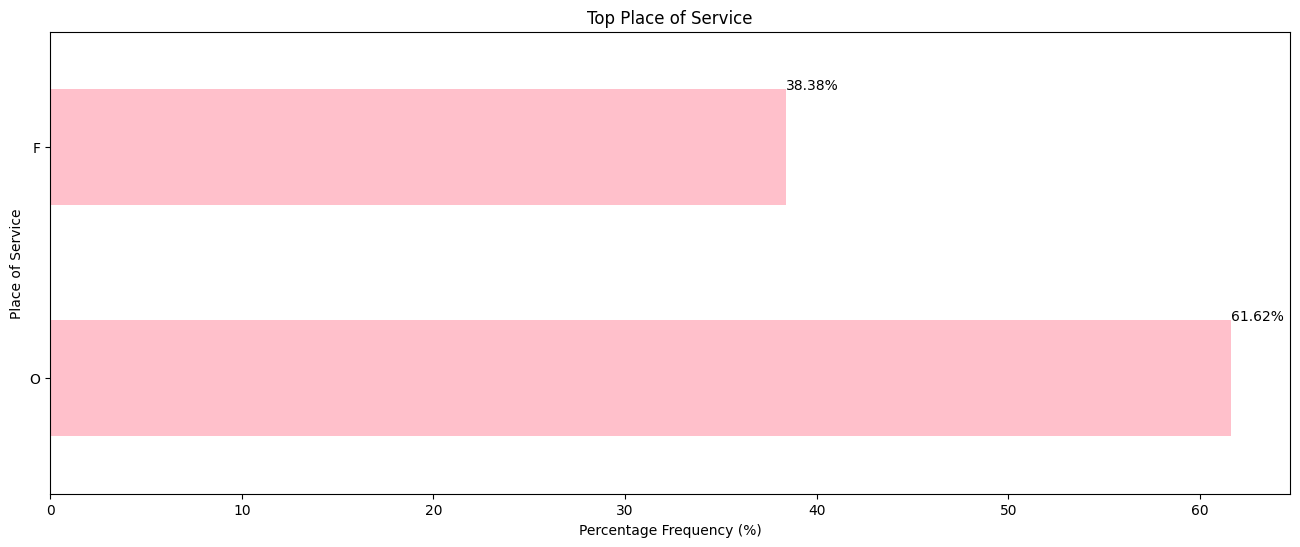

In [13]:
# Finding the top 10 most frequent City of the Provider

top_10 = df['City of the Provider'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes

plt.figure(figsize=(16, 6))
top_10.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars

for index, value in enumerate(top_10):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most City of the Provider')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('City of the Provider')
plt.gca().invert_yaxis()
plt.show()

# Finding  Place of Service

top_10 = df['Place of Service'].value_counts(normalize=True)*100

# Plotting the top 10 most frequent stock codes

plt.figure(figsize=(16, 6))
top_10.plot(kind='barh', color='pink')

# Adding the percentage frequency on the bars

for index, value in enumerate(top_10):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top Place of Service')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Place of Service')
#plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:
    
- The service Provider contributions by city  __NEW YORK__  contributes  __1.06%__ followed by HOUSTON and CHICAGO.
    
- The place of service is mostly  __Non-facility__ which is around __61.62%__ where as __Facility__ low number around __38.38%__ in the dataset. It shows many service providers also provide services outside facility
    

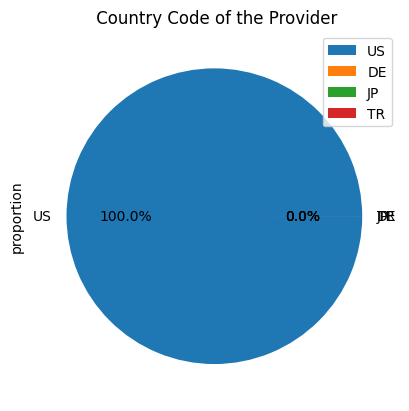

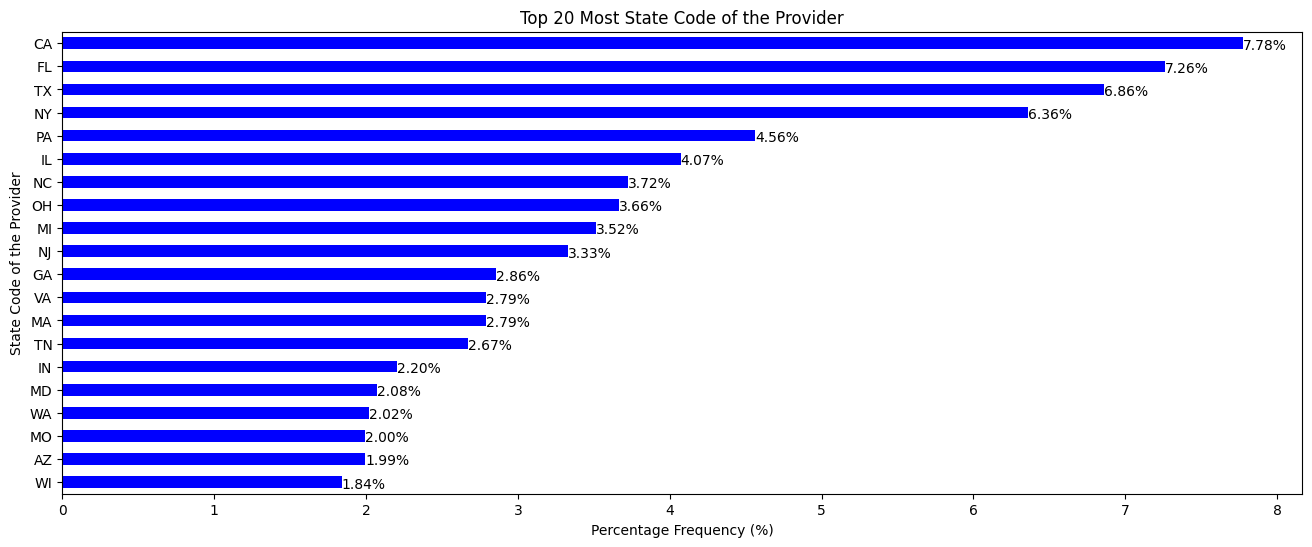

In [14]:
# Finding the top Country Code of the Provider

top_10 = df['Country Code of the Provider'].value_counts(normalize=True).head()

# Plotting 

top_10.plot(kind='pie' ,autopct='%1.1f%%')
plt.title(' Country Code of the Provider')
plt.legend()
plt.show()

# Finding the top 20 most State Code of the Provider

top_10 = df['State Code of the Provider'].value_counts(normalize=True).head(20) * 100

# Plotting the top 20 State Code of the Provider

plt.figure(figsize=(16, 6))
top_10.plot(kind='barh', color='blue')

# Adding the percentage frequency on the bars

for index, value in enumerate(top_10):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 20 Most State Code of the Provider')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('State Code of the Provider')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:
    
- The Country of providers is dominated by  __US__  holds almost all __100.00%__ records in dataset, other are only 3-4 in numbers.
    
- Threre are large part of Service providers comes from the state of __California__ which is around __7.78%__ of total providers followed by __Florida, Texas, Newyork__ has contribution around __7.26%, 6.86%, 6.36%__  respectively State-wise in the dataset.
    

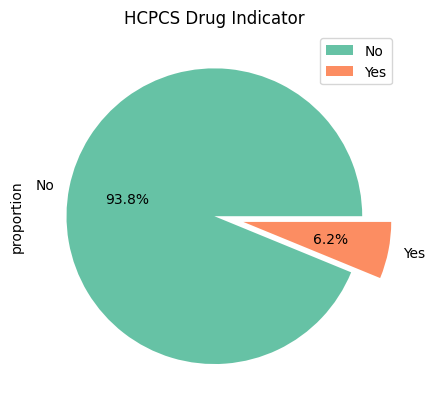

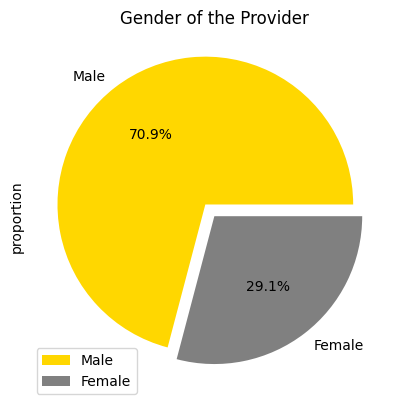

In [15]:

# Plotting the HCPCS Drug Indicator
top_1 = df['HCPCS Drug Indicator'].value_counts(normalize=True).head()
mylabels = ["No","Yes"]
myexplode = [0,0.2]
top_1.plot(kind='pie',labels=mylabels, explode=myexplode,  autopct='%1.1f%%' , colors=sns.color_palette('Set2'))
plt.title('HCPCS Drug Indicator')
plt.legend()
plt.show()

# Plotting the top  most frequent gender
top_1 = df['Gender of the Provider'].value_counts(normalize=True).head()
mylabels = ["Male","Female"]
myexplode = [0.1,0]
top_1.plot(kind='pie',  labels=mylabels , explode=myexplode, autopct='%1.1f%%' ,colors=['gold','grey'])
plt.title('Gender of the Provider')
plt.legend()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:
    
- The HCPCS Drug Indicator of __No__  holds more than __93.8%__  and __Yes__  has around __6.2%__ records in dataset.
    
- Threre are large part Gender type are __Male__ which is around __70.9%__ total patient and __Females__ has significantly low contribution around __29.1%__ in the dataset.
    

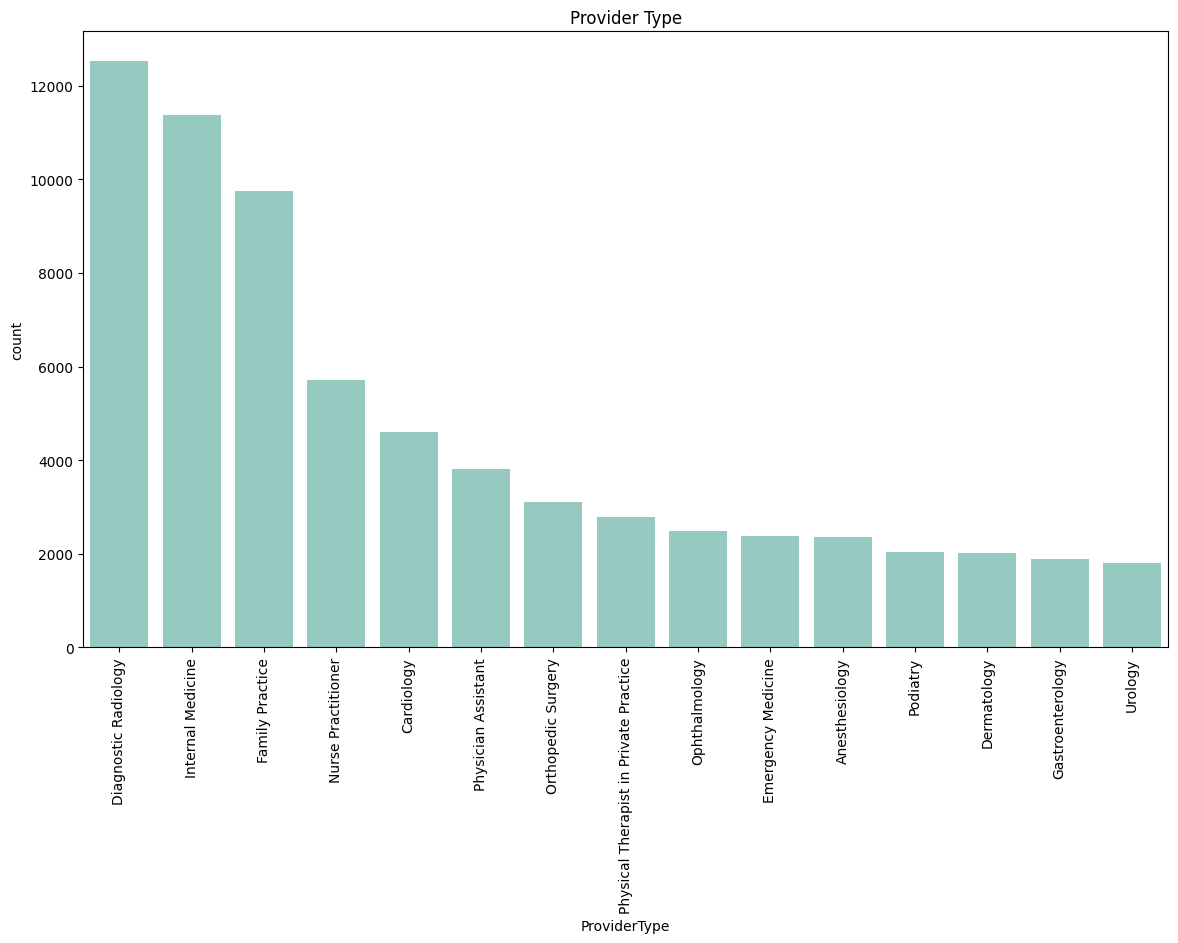

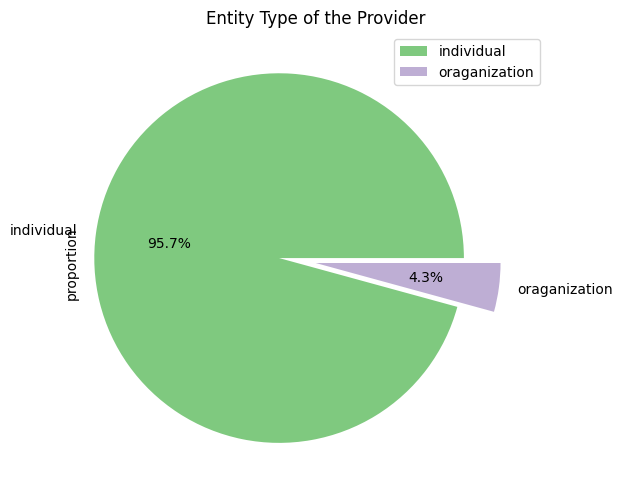

In [16]:

#plotting provider type and the count using countplot
sns.set_palette("Set3",15)
df.rename(columns={'Provider Type':'ProviderType'},inplace=True)
plt.figure(figsize=(14, 8))
group_count= 15
sns.countplot(x='ProviderType', data=df, order= df.ProviderType.value_counts().iloc[:group_count].index)
plt.title('Provider Type')
plt.xticks(rotation=90)
plt.show()

# Plotting the top  most frequent gender
top_1 = df['Entity Type of the Provider'].value_counts(normalize=True).head()
plt.figure(figsize=(8, 6))
mylabels = ["individual","oraganization"]
myexplode = [0.2,0]
top_1.plot(kind='pie',  labels=mylabels, explode=myexplode,autopct='%1.1f%%', colors=sns.color_palette('Accent') )
plt.title('Entity Type of the Provider')
plt.legend()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:
    
- The majority of Provider type is __Diagonostic Radiology__ which holds more than __12000__ count followed by __internal medicine__ which has around __11000__ records Top 10 contributes around 50% overall.
    
- Threre are large part entity type of providers are __individual__ around __95.7%__ providers are registered as individual. It indicates that most providers pratice individually and provide services
    

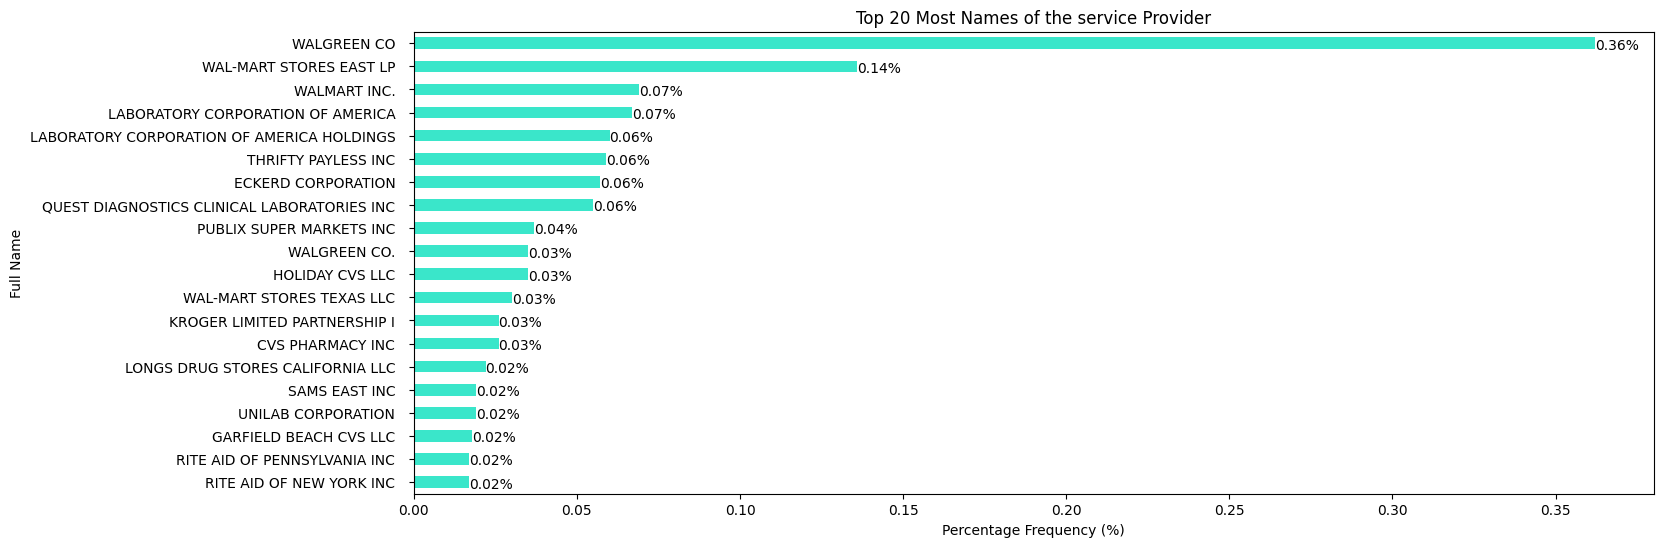

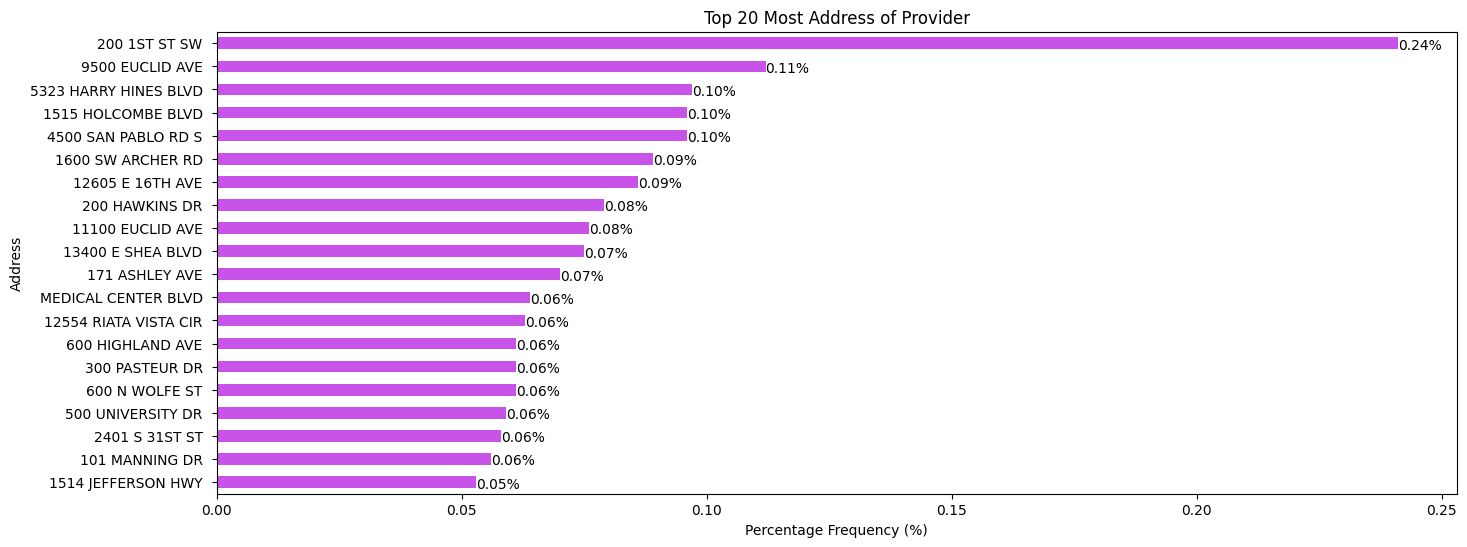

In [17]:

#remove nan from name and address column
 
df['Name'] = df['Name'].str.replace("nan","")
df['Full Address'] = df['Full Address'].str.replace("nan","")

#Name
top_10 = df['Name'].value_counts(normalize=True).head(20) * 100

# Plotting the top 20 Names of the Provider

plt.figure(figsize=(16, 6))
top_10.plot(kind='barh', color='#3AE6CA')

# Adding the percentage frequency on the bars

for index, value in enumerate(top_10):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 20 Most Names of the service Provider')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Full Name')
plt.gca().invert_yaxis()
plt.show()

#Address
top_10 = df['Full Address'].value_counts(normalize=True).head(20) * 100

# Plotting the top 20 Names of the Provider

plt.figure(figsize=(16, 6))
top_10.plot(kind='barh', color='#C853E8')

# Adding the percentage frequency on the bars

for index, value in enumerate(top_10):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 20 Most Address of Provider')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Address')
plt.gca().invert_yaxis()
plt.show()



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:
    
- The majority of service provider is WALGREEN co. which has around 0.36% around 360 out of 100000 entries.
    
- The 200 1ST ST SW is the most commonly found address of the provider in the dataset around  0.24% i.e.240 entries are found . Also almost majority addresses don't have null value at second line of address

<a id="rfm_features"></a>
# <b><span style='color:#fcc36d'>Step 4.2 |</span><span style='color:#ff6200'> Bivariate Analysis</span></b>

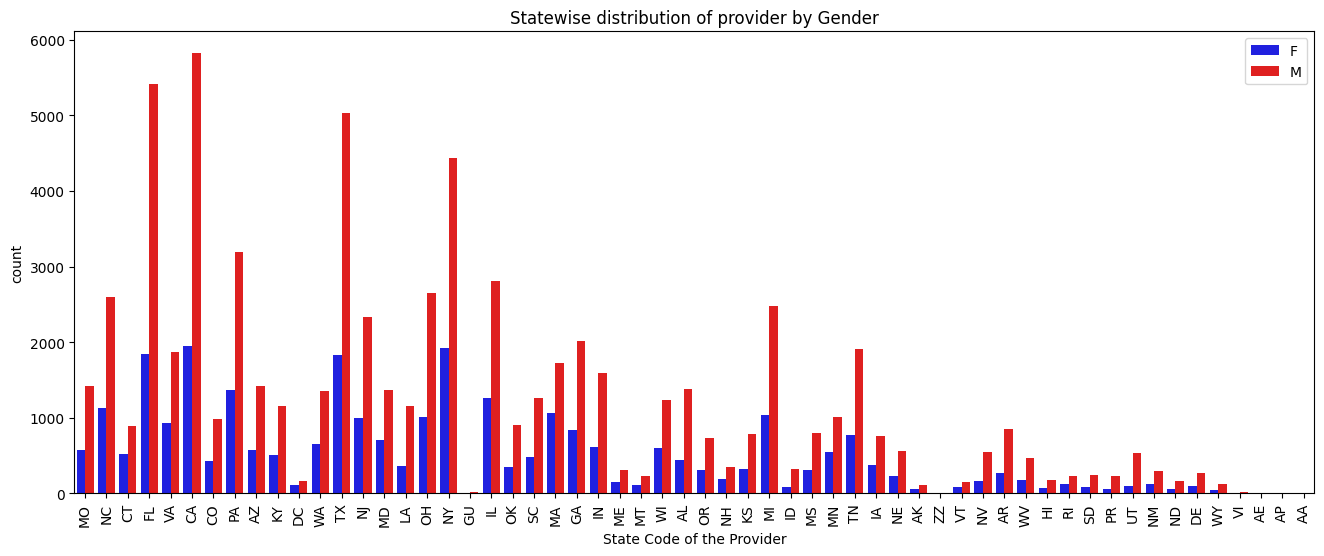

In [19]:

plt.figure(figsize=(16, 6))
sns.countplot(data=df, x="State Code of the Provider", hue="Gender of the Provider" ,palette=['blue','red'], )
plt.xticks(rotation=90)
plt.title("Statewise distribution of provider by Gender")
plt.legend()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:
    
- The highest no of providers is highest for male in California and Florida which is above 5000 .
    
- The highest Number of provider female is in Florida , California ,Texas and Newyork above 1500 females are evenly distributed.

<a id="correlation"></a>
# <p style="background-color: #3EE881; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;"> | Correlation Analysis</p>

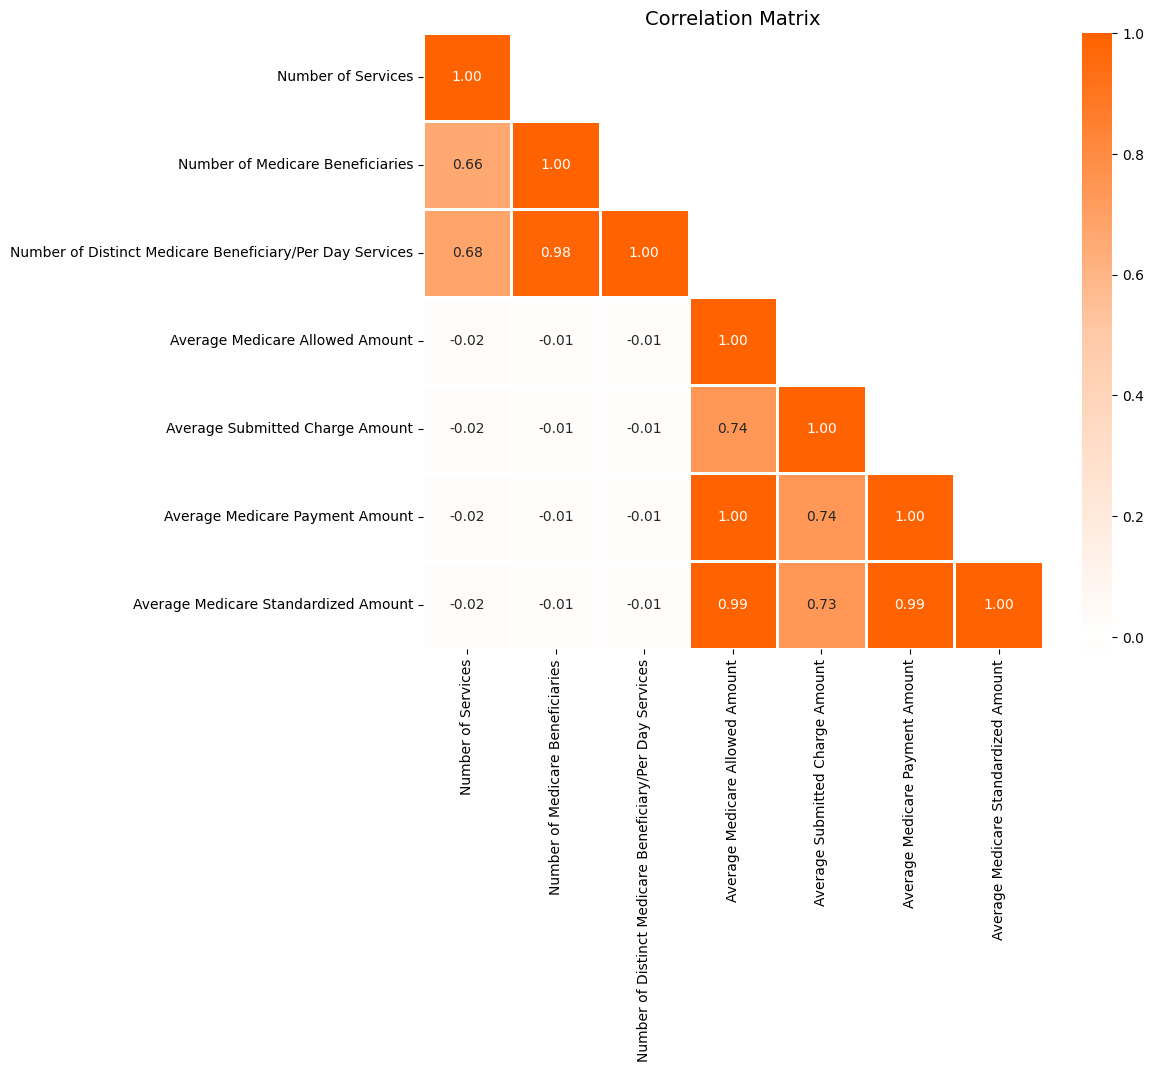

In [20]:
# Calculate the correlation matrix
correlation = df. corr(numeric_only = True)

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #87CEEB; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inference: </font></h3>

Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

- `Number of Medicare Beneficiaries` and `Number of Services`
        
- `Number of Distinct Medicare Beneficiary/Per Day Services` and `Number of Services`
    
- `Number of Distinct Medicare Beneficiary/Per Day Services` and `Number of Medicare Beneficiaries`
      
- `Average Submitted Charge Amount` and `Average Medicare Allowed Amount`
        
- `Average Medicare Payment Amount ` and `Average Medicare Allowed Amount`

- `Average Medicare Standardized Amount ` and `Average Medicare Allowed Amount`

- `Average Medicare Payment Amount ` and `Average Submitted Charge Amount`

- `Average Medicare Standardized Amount ` and `Average Submitted Charge Amount`

- `Average Medicare Standardized Amount ` and `Average Medicare Payment Amount`
    
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

In [21]:
df.sample(10).T

,84830,94113,53692,23401,27497,12051,68648,71446,16784,70901
Credentials of the Provider,MD,MD,MD,MD,MD,MD PHD,MD,PA-C,MD,MD
Gender of the Provider,M,M,F,M,F,F,M,M,F,F
Entity Type of the Provider,I,I,I,I,I,I,I,I,I,I
City of the Provider,NEW BERN,MIRAMAR BEACH,BILLINGS,BOSTON,NORTH RIVERSIDE,BUFFALO,RIVERVIEW,LADY LAKE,CHATTANOOGA,MOUNT VERNON
State Code of the Provider,NC,FL,MT,MA,IL,NY,FL,FL,TN,NY
Country Code of the Provider,US,US,US,US,US,US,US,US,US,US
ProviderType,Radiation Oncology,Family Practice,Internal Medicine,Diagnostic Radiology,Family Practice,Pathology,Urology,Physician Assistant,Interventional Cardiology,Internal Medicine
Medicare Participation Indicator,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
Place of Service,F,F,O,F,O,F,O,F,F,O
HCPCS Description,"Radiation treatment management, 5 treatments",Established patient office or other outpatient...,Established patient office or other outpatient...,Ultrasound of abdomen,Established patient office or other outpatient...,"Bone marrow, smear interpretation",Electronic assessment of bladder emptying,"Emergency department visit, problem of high se...",Ultrasound examination of heart including colo...,Routine EKG using at least 12 leads including ...
